<a href="https://colab.research.google.com/github/paulywere/Gold-Price-Prediction-with-Random-Forest-Regressor-using-Machine-Learning.ipynb/blob/main/Gold_Price_Prediction_with_Random_Forest_Regressor_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependancies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
# Loading the dataset

gold_data = pd.read_csv('/content/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# Getting the shape of the dataset(No. of rows and columns)

gold_data.shape

(2290, 6)

In [6]:
# Getting some more information

gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# Statisticals Measures

gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
# check for missing values

gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [10]:
# Checking for Duplicates

duplicated_values = gold_data[gold_data.duplicated]
duplicated_values

,Date,SPX,GLD,USO,SLV,EUR/USD


Correlation

1. positive
2. Negative

In [18]:
correlation = gold_data.corr()

<ipython-input-18-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

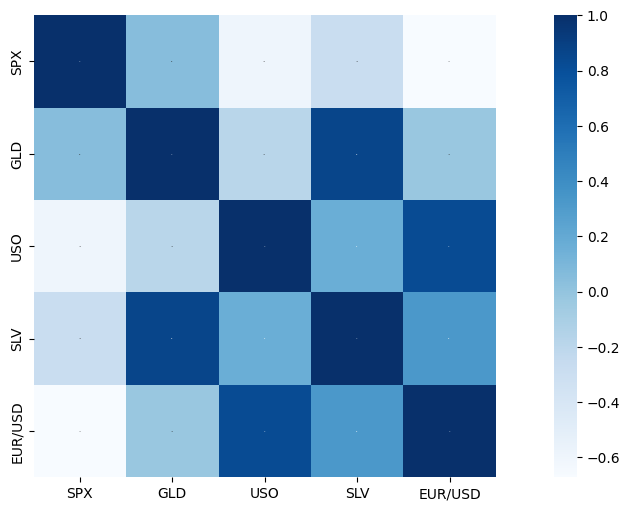

In [20]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(15, 6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':0}, cmap='Blues')

In [21]:
# Correlation valus of GLD

correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

<ipython-input-23-e808aa53a3e9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

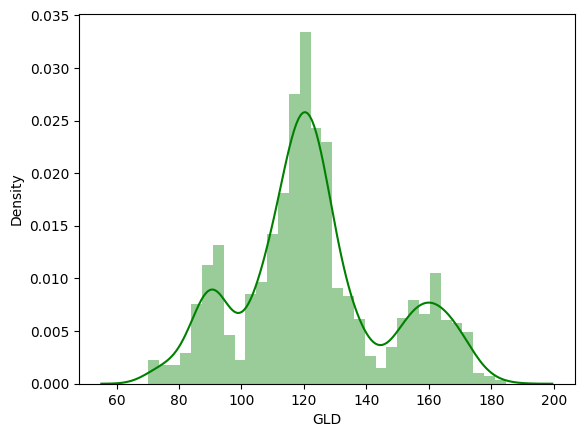

In [23]:
# Checking the distribution of the gold price

sns.distplot(gold_data['GLD'], color='green')

Splitting the features and the target

In [24]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [25]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [26]:
Y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

Splitting into training and test data

In [27]:
# Splitting Data into Train and Test Values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
X.shape, X_train.shape, X_test.shape

((2290, 4), (1832, 4), (458, 4))

Model Training

In [31]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

RandomForestRegressor()

Evaluation and Accuracy

In [32]:
# prediction on Training Data

training_data = model.predict(X_train)
training_data_accuracy = metrics.r2_score(training_data, Y_train)
print('The R sqared error is :', training_data_accuracy)

The R sqared error is : 0.9985282947566624


In [33]:
# prediction on Test Data

test_data = model.predict(X_test)
test_data_accuracy = metrics.r2_score(test_data, Y_test)
print('The R sqared error is :', test_data_accuracy)

The R sqared error is : 0.9891475851339259


Compare the actual and predicted values in a plot

In [37]:
Y_test = list(Y_test)

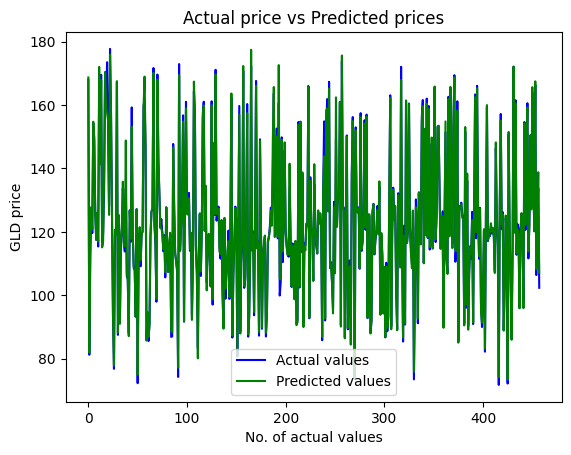

In [38]:
plt.plot(Y_test, color = 'blue', label = 'Actual values')
plt.plot(test_data, color = 'green', label = 'Predicted values')
plt.title('Actual price vs Predicted prices')
plt.xlabel('No. of actual values')
plt.ylabel('GLD price')
plt.legend()
plt.show()